### Importing libraries and data

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

data = 'http://bit.ly/w-data'
df = pd.read_csv(data)
df.head(2)

,Hours,Scores
0,2.5,21
1,5.1,47


### Cleaning and exploring data

In [64]:
df.shape

(25, 2)

In [65]:
df.duplicated().sum()

0

In [66]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Training the model

In [56]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9678055545167994

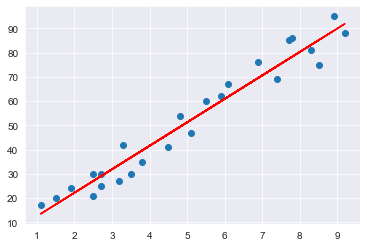

In [68]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='Red');

### Make predictions

In [57]:
y_pred = model.predict(X_test)

from sklearn.metrics import explained_variance_score
score = explained_variance_score(y_test, y_pred)
score

0.9684858031070392

In [67]:
pred = pd.DataFrame({'actual_values':y_test, 'pred_values':y_pred})
pred

,actual_values,pred_values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


#### What will be the predicted score if a student studies for 9.25 hrs/day?

In [76]:
hours = np.array(9.25).reshape(-1,1)
result = model.predict(hours)
print('The hours: {}'.format(hours[0][0]))
print('The predicted score: {}'.format(result[0]))

The hours: 9.25
The predicted score: 92.38611528261494


### Evaluating the model

In [79]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, y_pred)
print('The Mean Absolute Error: {}'.format(error))

The Mean Absolute Error: 3.9207511902099244
